In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

data = pd.read_csv('Housing (1).csv')

In [4]:
 x = data.drop('price', axis=1)
 y = data['price']

In [5]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])


In [10]:
linear_regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                             ('regressor', LinearRegression())])

In [11]:
linear_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories']),
                                                 ('cat', OneHotEncoder(),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [12]:
y_pred_lr = linear_regression_pipeline.predict(X_test)

In [13]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [14]:
print(f"\nLinear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")


Linear Regression Results:
Mean Squared Error: 1739553620722.752
R-squared: 0.6558453961589382


In [15]:
print(f"Predicted prices: {y_pred_lr[:5]}")
print(f"Actual prices: {y_test[:5].values}")

Predicted prices: [5218687.60025707 7208085.56255913 3096511.60517921 4597876.58326064
 3283282.33281424]
Actual prices: [4060000 6650000 3710000 6440000 2800000]


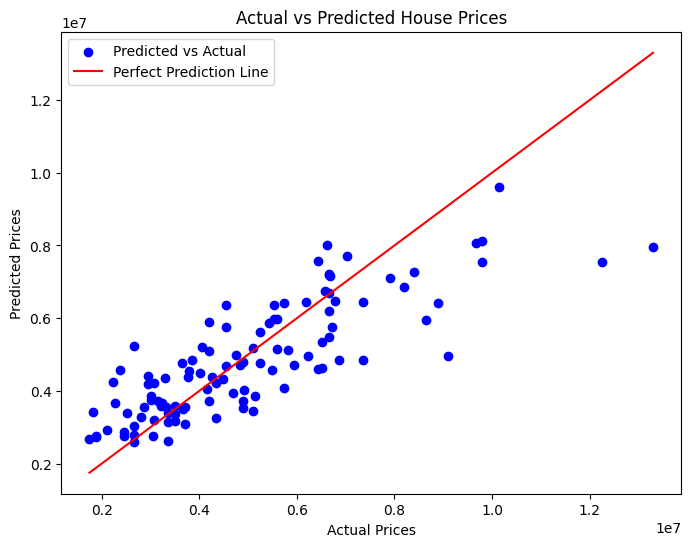

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [19]:
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                         ('regressor', DecisionTreeRegressor(random_state=42))])

In [20]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories']),
                                                 ('cat', OneHotEncoder(),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning', 'parking',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [21]:
y_pred_dt = decision_tree_pipeline.predict(X_test)

In [22]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [23]:
print(f"Decision Tree Regression Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")


Decision Tree Regression Results:
Mean Squared Error: 3074403066513.761
R-squared: 0.39175777233921616


In [24]:
print(f"Predicted prices: {y_pred_dt[:5]}")
print(f"Actual prices: {y_test[:5].values}")

Predicted prices: [5600000. 7840000. 3850000. 4935000. 2660000.]
Actual prices: [4060000 6650000 3710000 6440000 2800000]


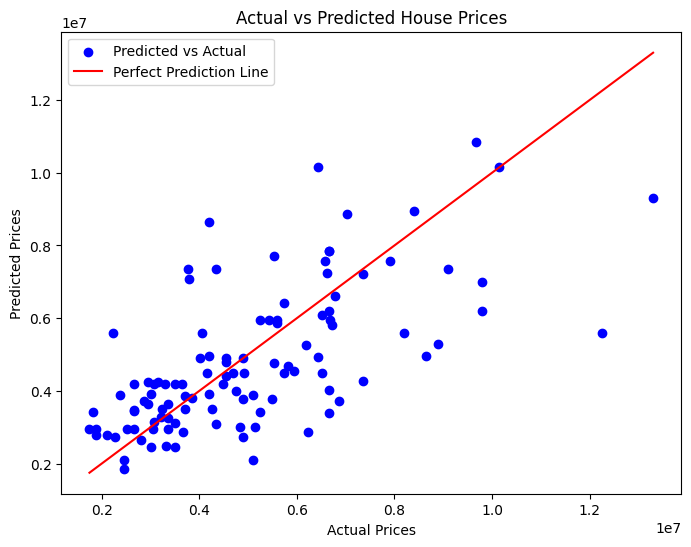

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

In [26]:
can_data = pd.read_csv('cancer.csv')

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [34]:
x_can = can_data.drop('target', axis=1)  # Features (drop the 'target' column)
y_can = can_data['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x_can, y_can, test_size=0.2, random_state=42)

In [37]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred = dt_classifier.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.74%


In [40]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [41]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[40  3]
 [ 3 68]]


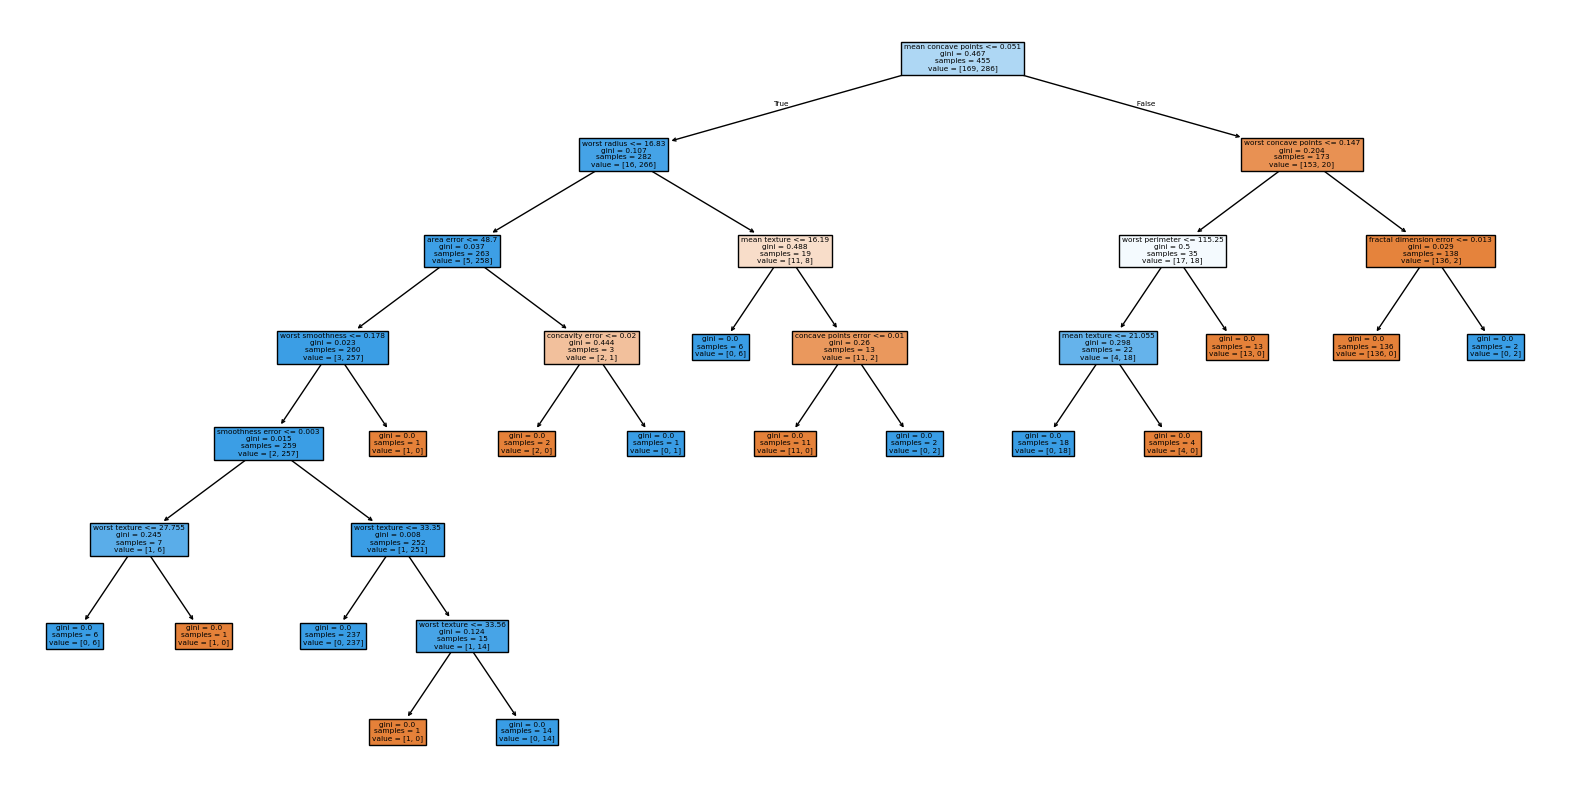

In [44]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=x_can.columns, filled=True)
plt.show()